In [2]:
%load_ext autoreload
%autoreload 2

# Link to the dataset

https://www.kaggle.com/datasets/imranalishahh/comprehensive-synthetic-e-commerce-dataset

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('synthetic_ecommerce_data.csv')

In [7]:
df.head(2)

,Transaction_ID,Customer_ID,Product_ID,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Category,Region,Ad_CTR,Ad_CPC,Ad_Spend
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,2024-10-06,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,2024-10-29,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56


<Axes: xlabel='Transaction_Date'>

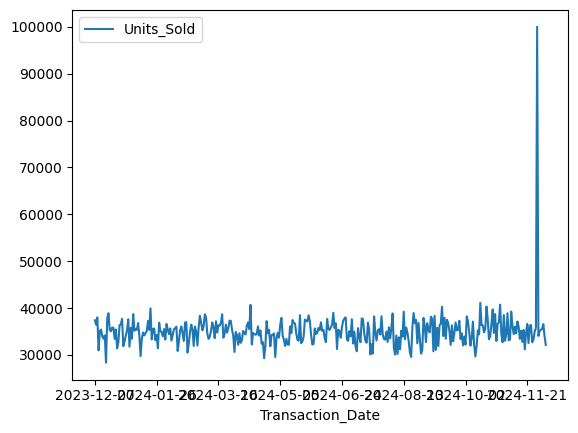

In [12]:
df_transactions_per_date = df.groupby('Transaction_Date')['Units_Sold'].sum().reset_index()

df_transactions_per_date.plot(x='Transaction_Date', y='Units_Sold')

In [18]:
# Let's check which product has the highest conversion rate
df.groupby('Product_ID')['Conversion_Rate'].mean().sort_values(ascending=False)

Product_ID
Product_119    0.360545
Product_694    0.344227
Product_115    0.317624
Product_532    0.316947
Product_144    0.316174
                 ...   
Product_583    0.125667
Product_128    0.125347
Product_768    0.124066
Product_260    0.123226
Product_953    0.112736
Name: Conversion_Rate, Length: 1000, dtype: float64

In [28]:
df.groupby('Product_ID')['Units_Sold'].sum().sort_values(ascending=False)

Product_ID
Product_215    18788
Product_366    18102
Product_746    17658
Product_202    17101
Product_606    16992
               ...  
Product_245     9301
Product_252     9228
Product_88      8727
Product_233     8471
Product_346     8268
Name: Units_Sold, Length: 1000, dtype: int64

In [25]:
df.groupby('Category')['Units_Sold'].sum()

Category
Books              2219356
Clothing           2471409
Electronics        3001900
Home Appliances    2370894
Toys               2769299
Name: Units_Sold, dtype: int64

In [33]:
def track_purchases_by_period(df, product_id):
    df_product_id = df[df['Product_ID'] == product_id]

    df_product_id.plot(x='Transaction_Date', y='Units_Sold')
    plt.show()

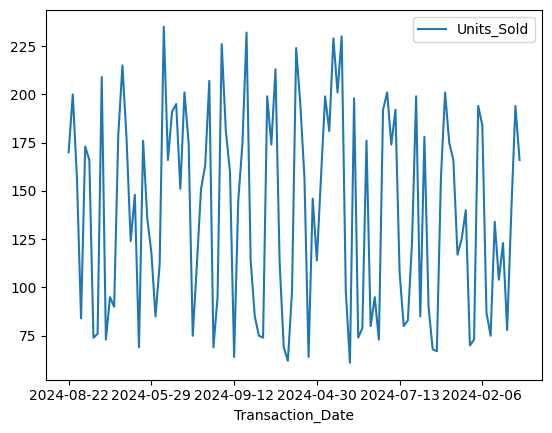

In [34]:
track_purchases_by_period(df, 'Product_1')

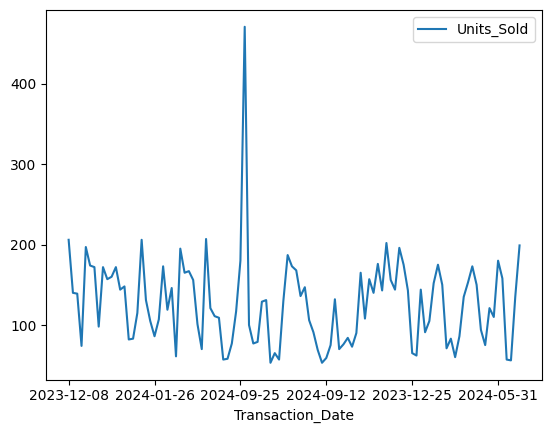

In [35]:
track_purchases_by_period(df, 'Product_100')

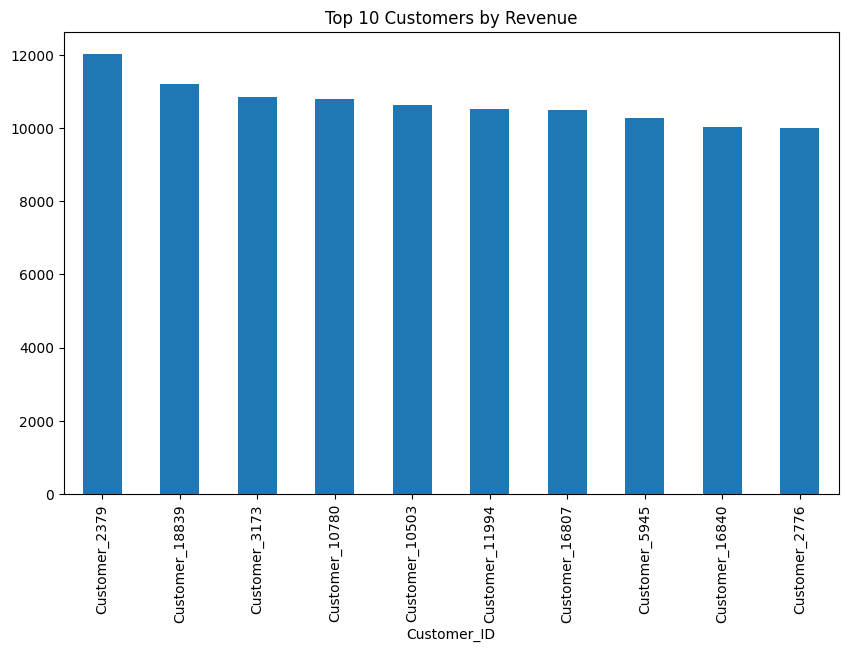

In [38]:
customer_revenue = df.groupby('Customer_ID')['Revenue'].sum().sort_values(ascending=False).head(10)
customer_revenue.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Customers by Revenue')
plt.show()

Text(0.5, 1.0, 'Average Revenue by Day of the Week')

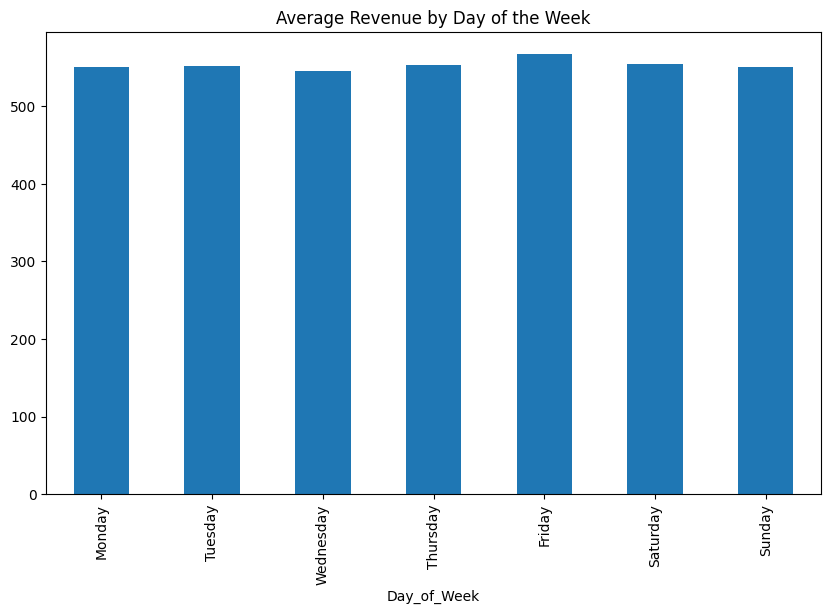

In [ ]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])  
df['Day_of_Week'] = df['Transaction_Date'].dt.day_name()
dow_revenue = df.groupby('Day_of_Week')['Revenue'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
dow_revenue.plot(kind='bar', figsize=(10, 6))
plt.title('Average Revenue by Day of the Week')

Text(0.5, 1.0, 'Ad Performance by Region')

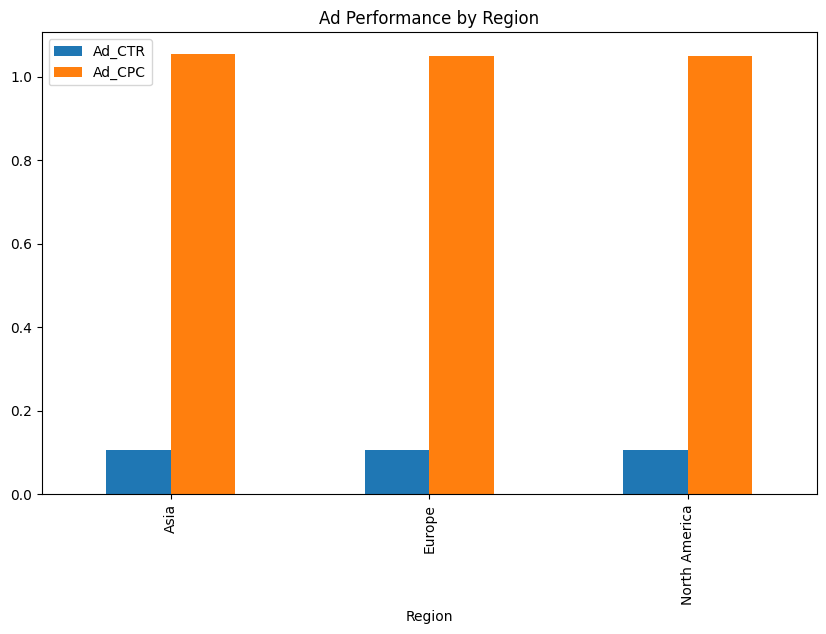

In [42]:
regional_ad_effectiveness = df.groupby('Region')[['Ad_CTR', 'Ad_CPC']].mean()
regional_ad_effectiveness.plot(kind='bar', figsize=(10, 6))
plt.title('Ad Performance by Region')